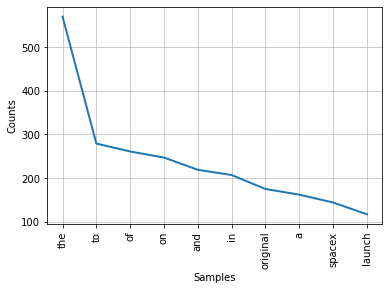

     the       to       of       on      and       in original        a   spacex   launch 
     570      279      261      247      219      207      175      162      144      117 


In [1]:
#Includes Stop Words
from bs4 import BeautifulSoup
import urllib.request
import nltk

def ReduceFreq(List,minNum): #function to remove words that do not appear under a certain number threshold
    tempList=[]
    for x in List:
        tempcount=List.count(x)
        if tempcount >= minNum:
            tempList.append(x)
        else:
            pass
    return tempList
#parse the website and tokenize
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
text = text.lower()
tokens = [t for t in text.split()]
# Removing tokens that appear less than 5 times
bigtokens=[]
bigtokens = ReduceFreq(tokens,5)

freq = nltk.FreqDist(bigtokens)
#for key,val in freq.items(): #This prints out the token and number pairs
#    print(str(key)+':'+str(val))
freq.plot(10, cumulative=False) #line plot of top 10
freq.tabulate(10) #creates table of top 10

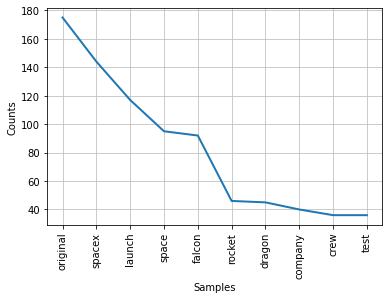

original   spacex   launch    space   falcon   rocket   dragon  company     crew     test 
     175      144      117       95       92       46       45       40       36       36 


In [2]:
#No Stop Words
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import urllib.request

#Defining Stop Words
sr = stopwords.words('english')
NewStopWords = ['retrieved1','first','january','february','march','april','may','june','july','august','september','october','november','december','2017.','2020.']
sr.extend(NewStopWords)
NewStopWords = ['1','2','3','4','5','6','7','8','9','0']
sr.extend(NewStopWords)
#parse the website and tokenize
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
text = text.lower()
tokens = [t for t in text.split()]
#removing Stop Words
clean_tokens = tokens[:]
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)
# Removing tokens that appear less than 5 times
bigtokens=[]
bigtokens = ReduceFreq(clean_tokens,5)

freq = nltk.FreqDist(bigtokens)
#for key,val in freq.items():    #This prints out the token and number pairs
#    print(str(key)+':'+str(val))
freq.plot(10, cumulative=False) # line plot of top 10
freq.tabulate(10) # creates table of top 10